**Objective:**  The primary objective of this assignment is to develop your ability to build, tune, and evaluate decision tree and random forest models. You will use these models to solve a classification or regression problem, demonstrating your ability to handle complex machine learning algorithms and improve model performance through tuning and analysis.


#Instructions:


Data Preparation:

Task 1: Use a dataset (e.g., a dataset for predicting loan approval based on features like credit score, income, loan amount, etc.).

Task 2: Conduct necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features as needed.

Model Training:

Task 3: Split the data into training and test sets.

Task 4: Train a decision tree model on the training data.

Task 5: Train a random forest model on the training data, using default hyperparameters.

Model Evaluation:

Task 6: Evaluate each model on the test set using appropriate metrics (e.g., accuracy, RMSE, R² for regression tasks; accuracy, precision, recall, F1-score for classification tasks).

Task 7: Generate and interpret feature importance scores from the random forest
model.

Model Tuning and Validation:

Task 8: Compare the performance of the model to the default model and discuss any improvements or changes in performance.

Report and Insights:

Task 9: Write a detailed report summarizing your methodology, findings, insights, and recommendations. Discuss the behavior of decision trees versus random forests in your specific application and the impact of model tuning.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



df = pd.read_csv('/content/loan_approval_dataset.csv', sep = ',')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.isnull().sum()


,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [5]:
df.duplicated().sum()


0

In [6]:
df.describe()



,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:

df.drop(columns=['loan_id'], inplace=True)

In [9]:
df.columns = df.columns.str.strip()


In [10]:
df.rename(columns=lambda x: x.strip(), inplace=True)

# Display the updated DataFrame
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [11]:
numeric_columns = [
    'income_annum', 'loan_amount', 'loan_term',
    'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value',
    'bank_asset_value'
]

In [12]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_iqr = {col: detect_outliers_iqr(df, col) for col in numeric_columns}
print("Outlier: ", len(outliers_iqr))

Outlier:  8


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [14]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [15]:
# Swap the values manually
df['loan_status'] = df['loan_status'].replace({0: 1, 1: 0})

# Check the result
print(df['loan_status'].value_counts())


loan_status
1    2656
0    1613
Name: count, dtype: int64


In [16]:
# Assuming your DataFrame is named `data`
loan_status_counts = df['loan_status'].value_counts()

# Display the counts
print(loan_status_counts)


loan_status
1    2656
0    1613
Name: count, dtype: int64


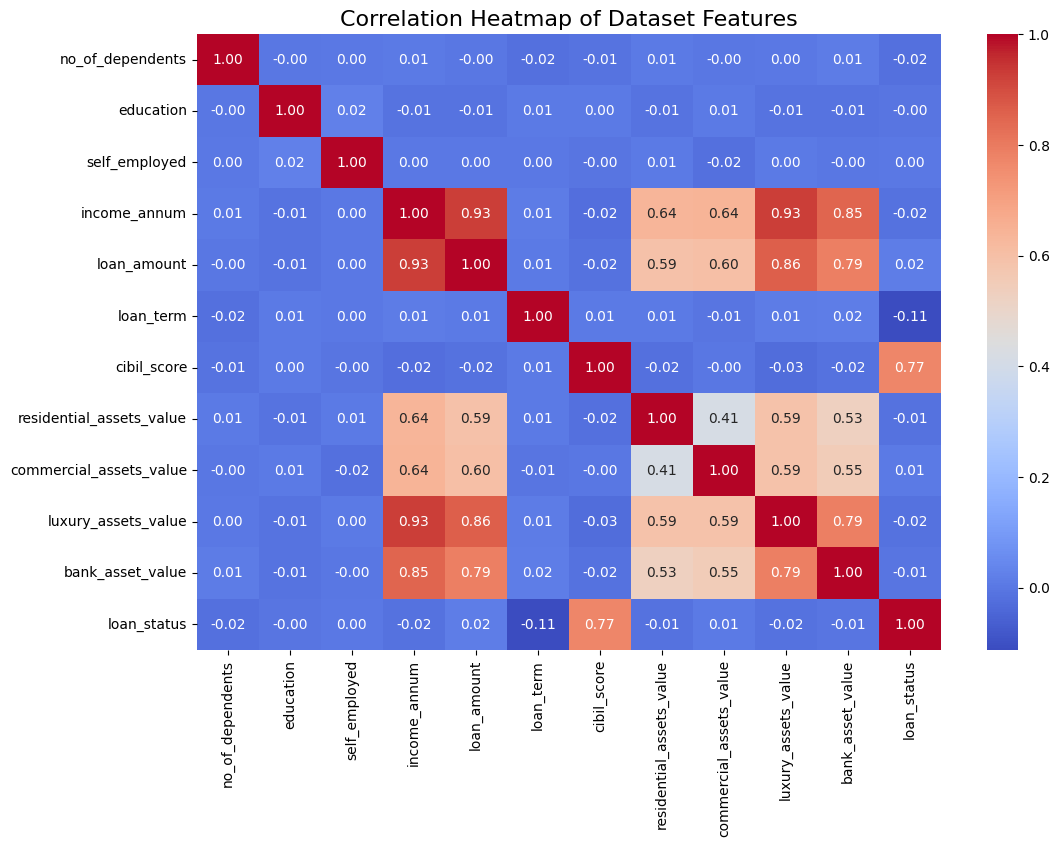

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is in a DataFrame called `data`
plt.figure(figsize=(12, 8))

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title
plt.title("Correlation Heatmap of Dataset Features", fontsize=16)

# Show the plot
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
print(y_train.unique())  # For unique values
print(y_train.describe())  # For statistical summary


[0 1]
count    2988.000000
mean        0.617805
std         0.486005
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: loan_status, dtype: float64


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluation metrics
print("Decision Tree Performance:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       471
           1       0.97      0.98      0.98       810

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281

Accuracy: 0.9726775956284153

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

Accuracy: 0.9797033567525371


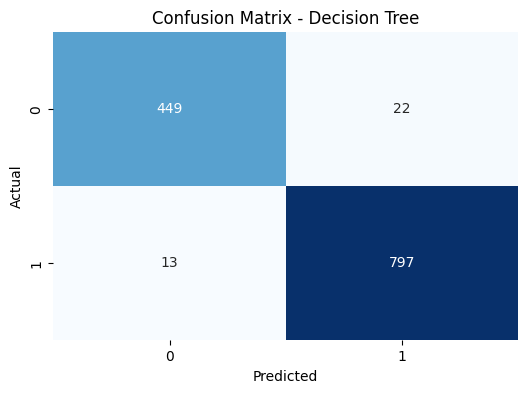

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

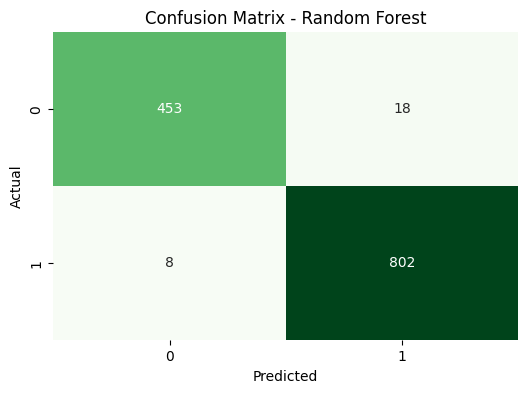

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

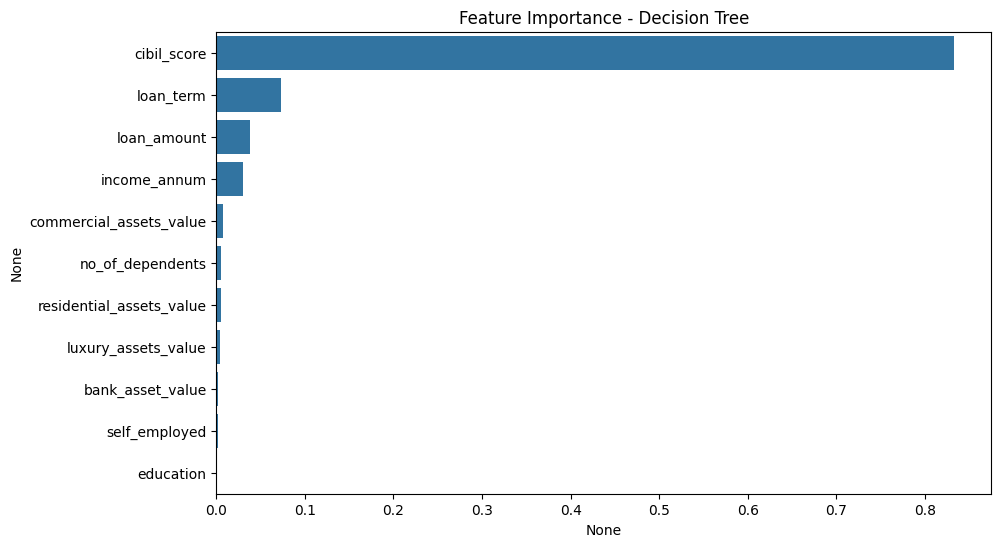

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Decision Tree")
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']  # Options for splitting criteria
}

# Perform Grid Search
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validated Accuracy: 0.9815919060183862


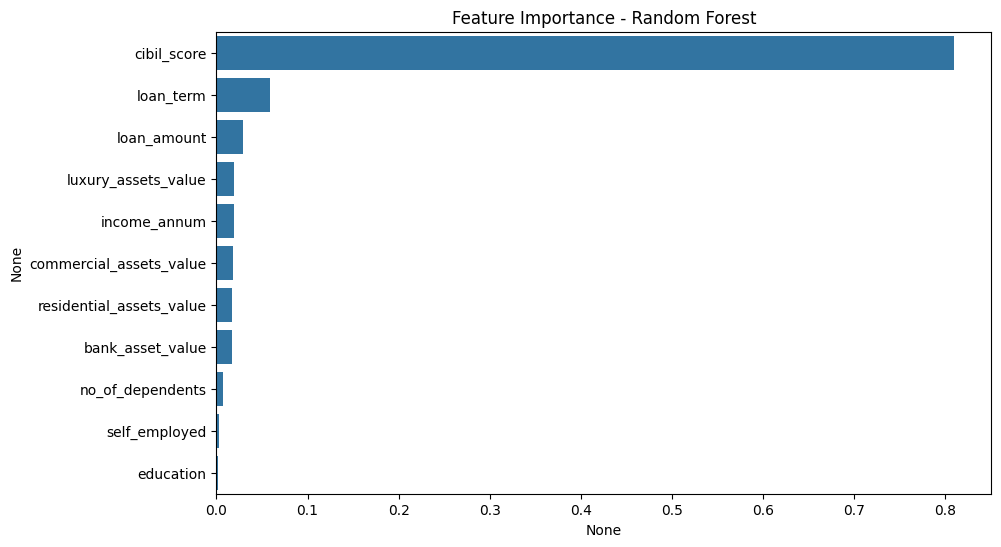

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()


In [104]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3],
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.98025467359092


,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
0,50,None,2,1,0.978915,11
1,100,None,2,1,0.979919,3
2,200,None,2,1,0.977912,19
3,50,None,5,1,0.977245,23
4,100,None,5,1,0.975571,35
5,200,None,5,1,0.978249,15
6,50,None,2,2,0.979586,5
7,100,None,2,2,0.980255,1
8,200,None,2,2,0.979585,7
9,50,None,5,2,0.976239,31


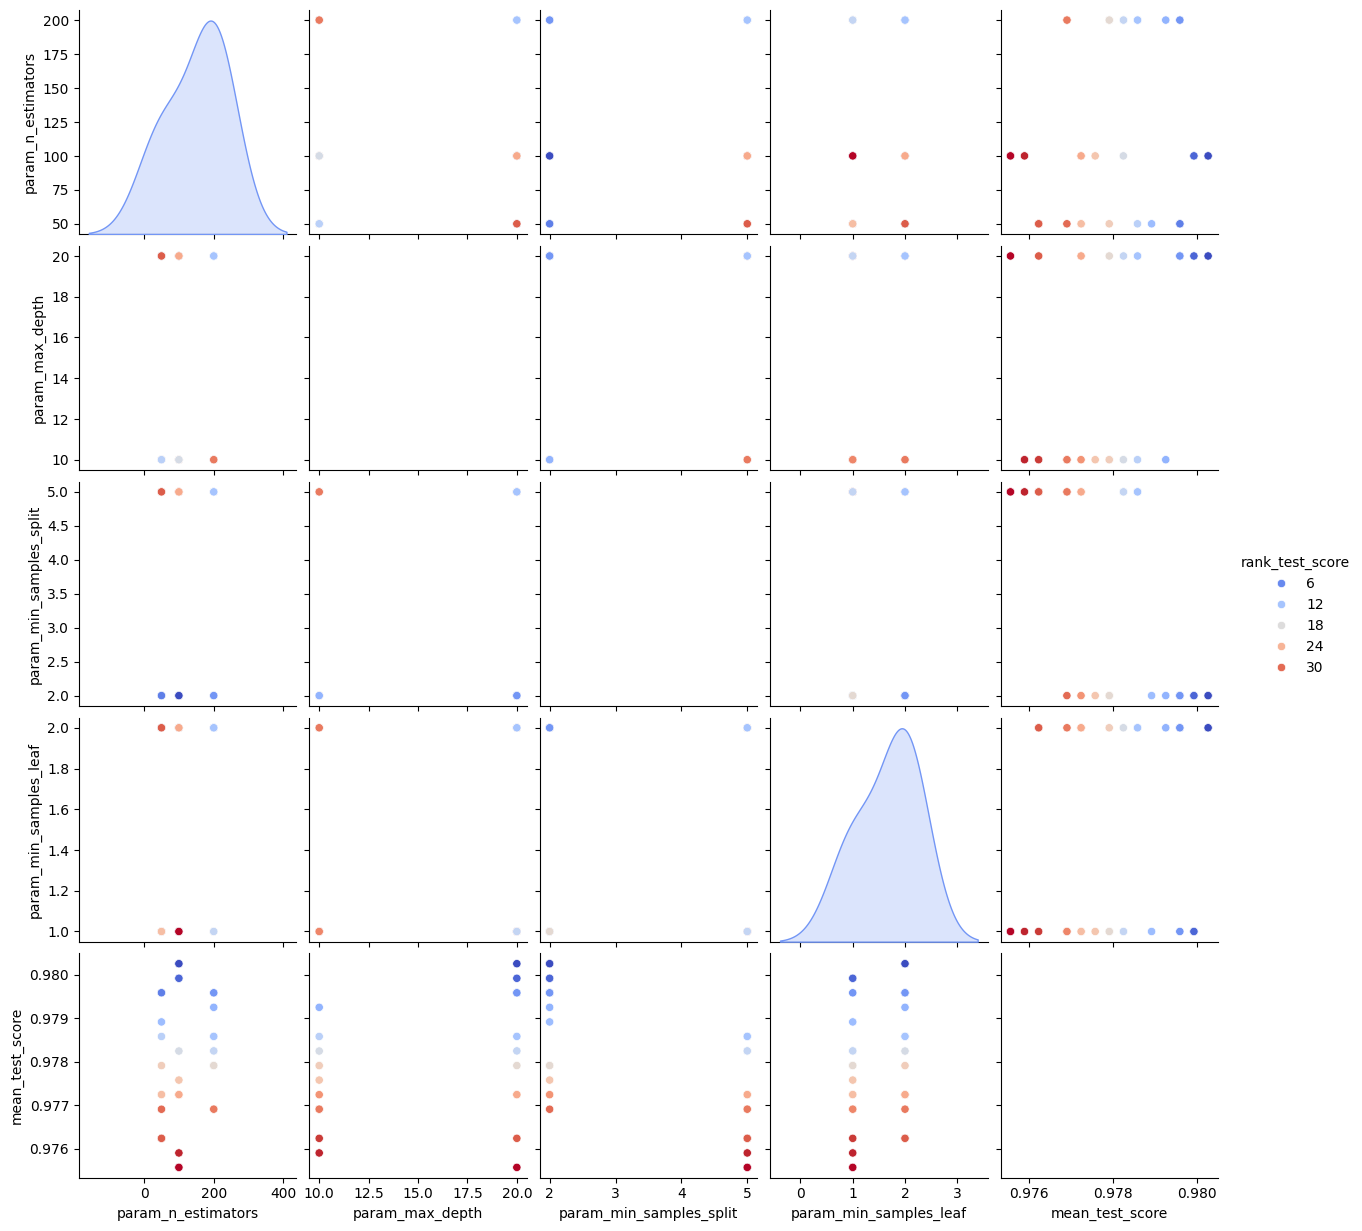

In [98]:
# Pairplot to see relationships among all parameters
sns.pairplot(results_df, vars=['param_n_estimators', 'param_max_depth',
                                'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score'],
             diag_kind='kde', hue='rank_test_score', palette='coolwarm')
plt.show()
